# Evaluation of Minkowski functionals by epoch

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
from rockgan.architecture import *
from rockgan.utils import *

import porespy as ps
from quantimpy import minkowski as mk
from skimage.measure import euler_number

## Importing Real dataset

In [3]:
# Uploading 1024 samples extracted from the original sample
DATASET = torch.from_numpy(np.load('../data/Berea_subpatches.npy'))
print(DATASET.shape)

torch.Size([1024, 128, 128, 128])


In [4]:
area_real = np.zeros((len(DATASET[:,0,0,0])))
surface_real = np.zeros((len(DATASET[:,0,0,0])))
curvature_real = np.zeros((len(DATASET[:,0,0,0])))
euler_real = np.zeros((len(DATASET[:,0,0,0])))

for i in range((len(DATASET[:,0,0,0]))):
    area_real[i],surface_real[i], curvature_real[i],euler_real[i] = \
    mk.functionals(DATASET[i,:,:,:].numpy()<0.5,norm=True)
    
mean_phi_real = np.mean(area_real)
mean_surface_real = np.mean(surface_real)
mean_curvature_real = np.mean(curvature_real)
mean_euler_real = np.mean(euler_real)

## Specifying GPU

In [5]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

DEVICE = torch.device('cuda')

## Parameters for loading the models

In [6]:
# Training hyperparameters
LEARNING_RATE = 1e-3
BATCH_SIZE = 32
Z_DIM = 16
# fixed noise for display
fixed_noise = torch.randn(BATCH_SIZE,1, Z_DIM, Z_DIM, Z_DIM).to(DEVICE)
# generator
gen = Generator(in_channel=1, out_channel=1).to(DEVICE)
# optimizer
opt_gen = optim.Adam(gen.parameters(), lr=LEARNING_RATE, betas=(0.0, 0.9))

# Minkowski Functionals

## RockGAN

In [7]:
# avoid epochs mistakes computing curvature (position 16,17,18) when jumping by a factor 2.
epochs = np.arange(0, 102, 2, dtype=int)
epochs = np.delete(epochs, [17,18,19])[1:]-1

In [8]:
# epochs = np.arange(0, 102, 2, dtype=int)[1:]-1
mean_phi_VWGAN = []
mean_surface_VWGAN = [] 
mean_curvature_VWGAN = [] 
mean_euler_VWGAN = []

for i in epochs:
    #Loading generator per epochs
    load_checkpoint(f"../checkpoints/generator/generator_no_poro_{i}_V2.pt", \
                    model=gen, optimizer=opt_gen, lr=1e-3)
    fake_images = gen(fixed_noise).detach().cpu().numpy().reshape(BATCH_SIZE,128,128,128)
    
    #Initialize matrices to store
    area_fake = np.zeros((len(fake_images[:,0,0,0])))
    surface_fake = np.zeros((len(fake_images[:,0,0,0])))
    curvature_fake = np.zeros((len(fake_images[:,0,0,0])))
    euler_fake = np.zeros((len(fake_images[:,0,0,0])))
    

    for j in range((len(fake_images[:,0,0,0]))):
        area_fake[j],surface_fake[j],curvature_fake[j], euler_fake[j] = \
        mk.functionals(fake_images[j,:,:,:]<0.5,norm=True)

    mean_phi_VWGAN.append(np.mean(area_fake)), mean_surface_VWGAN.append(np.mean(surface_fake)), \
    mean_curvature_VWGAN.append(np.mean(curvature_fake)), mean_euler_VWGAN.append(np.mean(euler_fake))

#Converting into arrays
mean_phi_VWGAN =  np.array(mean_phi_VWGAN)   
mean_surface_VWGAN = np.array(mean_surface_VWGAN) 
mean_curvature_VWGAN = np.array(mean_curvature_VWGAN) 
mean_euler_VWGAN = np.array(mean_euler_VWGAN) 


=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading

## CRockGAN

In [9]:
mean_phi = []
mean_surface = [] 
mean_curvature = [] 
mean_euler = []

#v4 used for the plots on the abstract
for i in epochs:
    #Loading generator per epochs
    load_checkpoint(f"../checkpoints/generator/generator_poro_{i}_v4.pt", \
                    model=gen, optimizer=opt_gen, lr=1e-3)
    fake_images = gen(fixed_noise).detach().cpu().numpy().reshape(BATCH_SIZE,128,128,128)
    
    #Initialize matrices to store
    area_fake = np.zeros((len(fake_images[:,0,0,0])))
    surface_fake = np.zeros((len(fake_images[:,0,0,0])))
    curvature_fake = np.zeros((len(fake_images[:,0,0,0])))
    euler_fake = np.zeros((len(fake_images[:,0,0,0])))
    

    for j in range((len(fake_images[:,0,0,0]))):
        area_fake[j],surface_fake[j],curvature_fake[j], euler_fake[j] = \
        mk.functionals(fake_images[j,:,:,:]<0.5,norm=True)

    mean_phi.append(np.mean(area_fake)), mean_surface.append(np.mean(surface_fake)), \
    mean_curvature.append(np.mean(curvature_fake)), mean_euler.append(np.mean(euler_fake))

#Converting into arrays
mean_phi =  np.array(mean_phi)   
mean_surface = np.array(mean_surface) 
mean_curvature = np.array(mean_curvature) 
mean_euler = np.array(mean_euler) 

=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading

## Comparing metrics of RockGAN and CRockGAN by epochs

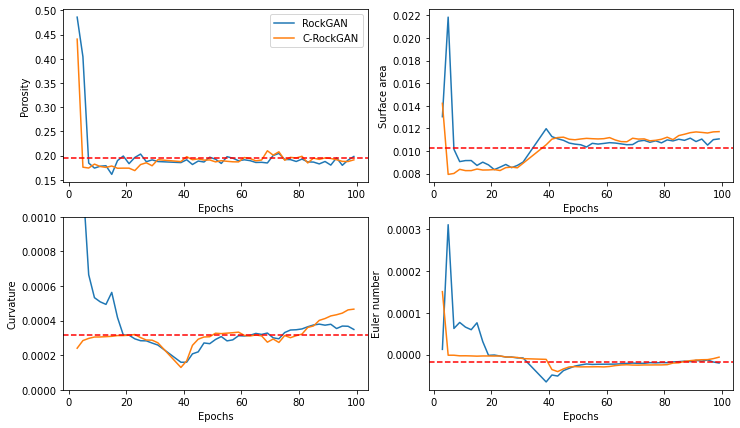

In [10]:
fig, ax = plt.subplots(2,2, figsize=(12,7))

#Porosity
ax[0,0].plot(epochs[1:], np.array(mean_phi_VWGAN)[1:], label='RockGAN')
ax[0,0].plot(epochs[1:], np.array(mean_phi)[1:], label='C-RockGAN')
ax[0,0].axhline(mean_phi_real, color='red',linestyle='--')
ax[0,0].set_xlabel('Epochs')
ax[0,0].set_ylabel('Porosity')
ax[0,0].legend()
#Surface area
ax[0,1].plot(epochs[1:], np.array(mean_surface_VWGAN)[1:])
ax[0,1].plot(epochs[1:], np.array(mean_surface)[1:])
ax[0,1].axhline(mean_surface_real, color='red',linestyle='--')
ax[0,1].set_xlabel('Epochs')
ax[0,1].set_ylabel('Surface area')
#Curvature
ax[1,0].plot(epochs[2:], np.array(mean_curvature_VWGAN)[2:])
ax[1,0].plot(epochs[1:], np.array(mean_curvature)[1:])
ax[1,0].axhline(mean_curvature_real, color='red',linestyle='--')
ax[1,0].set_xlabel('Epochs')
ax[1,0].set_ylabel('Curvature')
ax[1,0].set_ylim([0,0.001])
#Euler number
ax[1,1].plot(epochs[1:], np.array(mean_euler_VWGAN)[1:])
ax[1,1].plot(epochs[1:], np.array(mean_euler)[1:])
ax[1,1].axhline(mean_euler_real, color='red',linestyle='--')
ax[1,1].set_xlabel('Epochs')
ax[1,1].set_ylabel('Euler number')
plt.show()

## Comparing samples evolution

### RockGAN samples

In [11]:
epochs = np.arange(0, 102, 2, dtype=int)[1:]-1

In [12]:
samples_RockGAN=[]

for i in epochs:
    #Loading generator per epochs
    load_checkpoint(f"../checkpoints/generator/generator_no_poro_{i}_V2.pt", \
                    model=gen, optimizer=opt_gen, lr=1e-3)
    fake_images = gen(fixed_noise).detach().cpu().numpy().reshape(BATCH_SIZE,128,128,128)
    
    samples_RockGAN.append(np.round(fake_images[np.random.randint(1, BATCH_SIZE)]))
    
samples_RockGAN = np.array(samples_RockGAN)

=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading

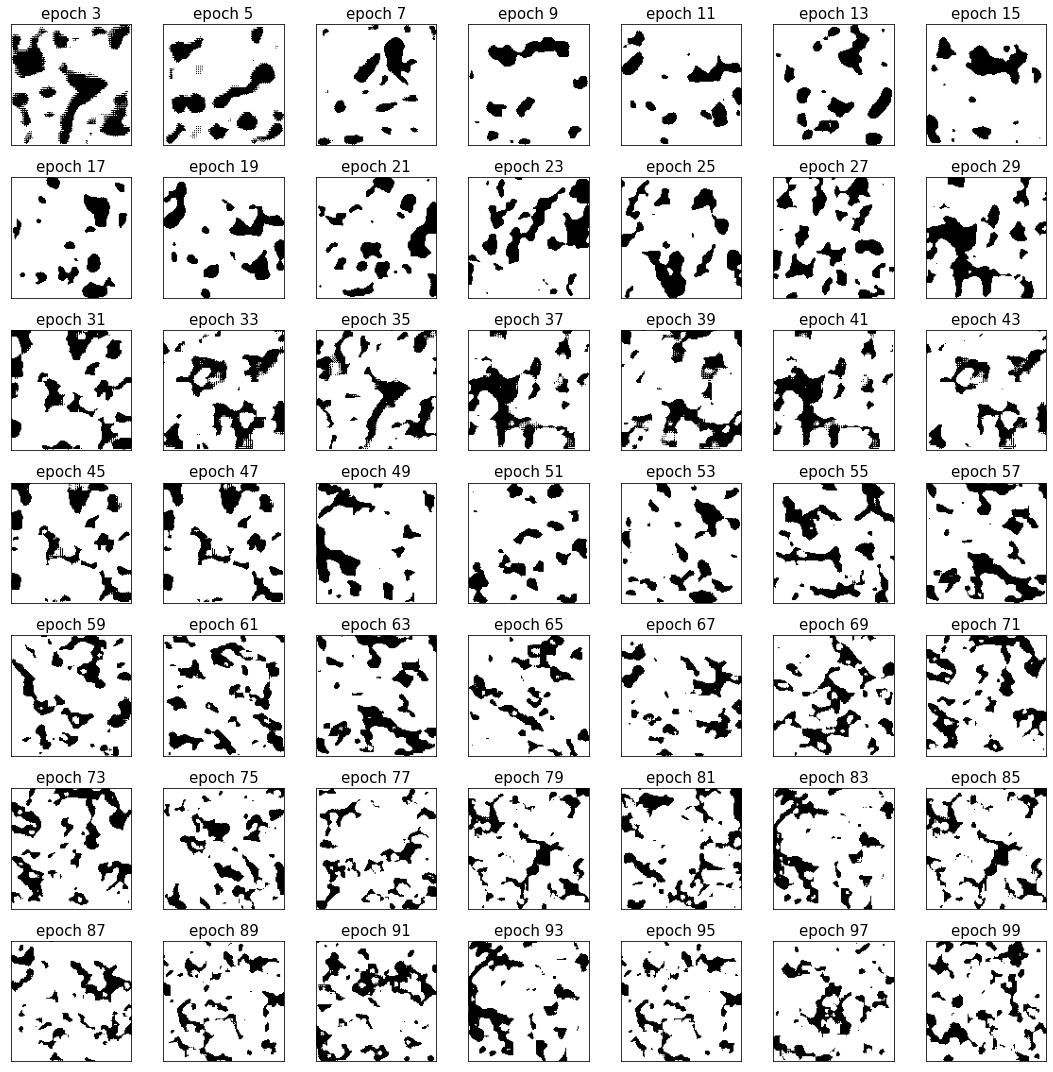

In [13]:
fig = plt.figure(figsize=(15, 15))
columns = 7
rows = 7
for i in range(1, columns*rows +1):
    img = samples_RockGAN[i,0,:,:]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img,cmap = 'gray')
    plt.xticks([], [])
    plt.yticks([], [])
    plt.title(f'epoch {epochs[i]}',fontsize=15)
fig.tight_layout()
plt.show()

### CRockGAN samples

In [14]:
samples_CRockGAN =[]

for i in epochs:
    #Loading generator per epochs
    load_checkpoint(f"../checkpoints/generator/generator_poro_{i}_v4.pt", \
                    model=gen, optimizer=opt_gen, lr=1e-3)
    fake_images = gen(fixed_noise).detach().cpu().numpy().reshape(BATCH_SIZE,128,128,128)
    
    samples_CRockGAN.append(np.round(fake_images[np.random.randint(1, BATCH_SIZE)]))
    
samples_CRockGAN  = np.array(samples_CRockGAN)

=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading

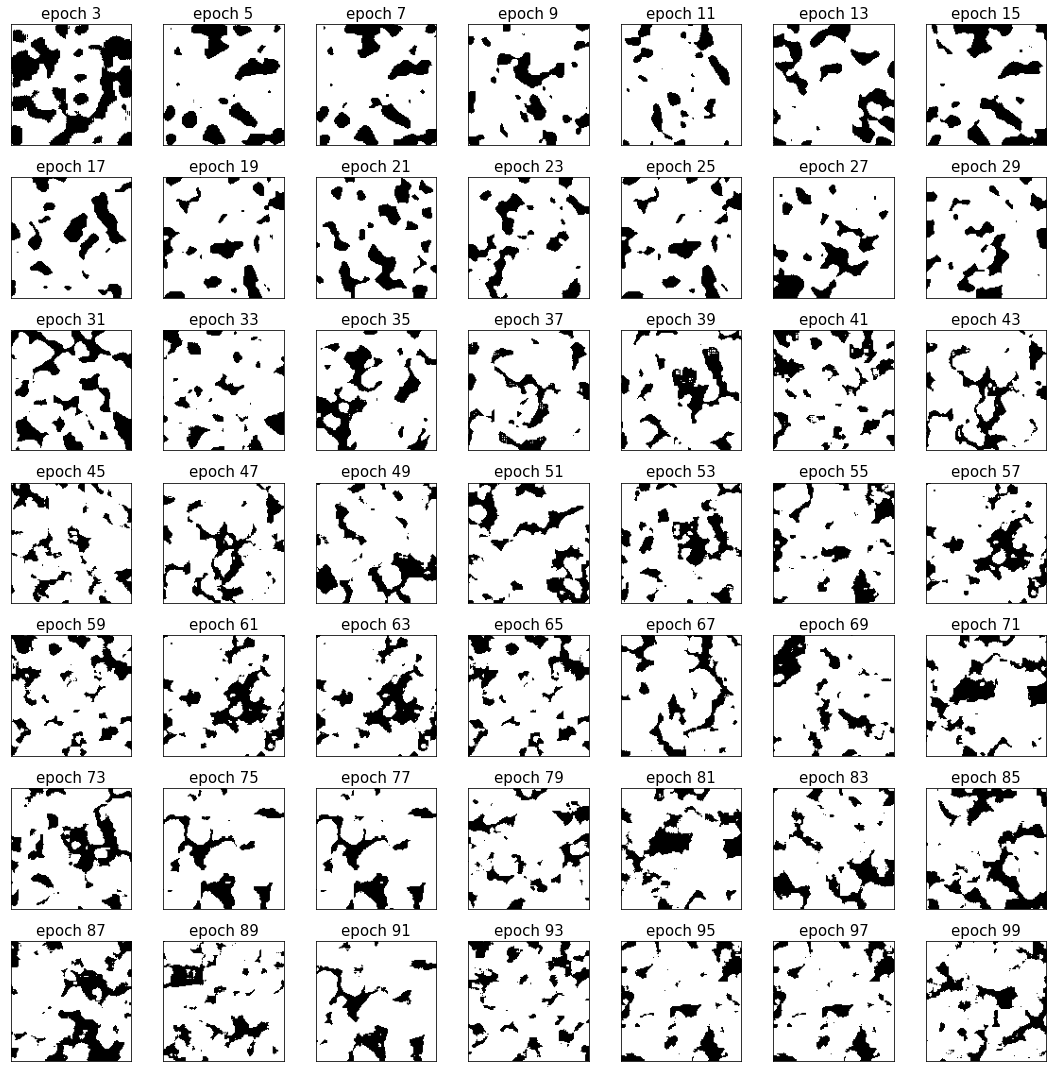

In [15]:
fig = plt.figure(figsize=(15, 15))
columns = 7
rows = 7
for i in range(1, columns*rows +1):
    img = samples_CRockGAN[i,10,:,:]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img,cmap = 'gray')
    plt.xticks([], [])
    plt.yticks([], [])
    plt.title(f'epoch {epochs[i]}', fontsize=15)
fig.tight_layout()
plt.show()

### Real 2D slides for comparison

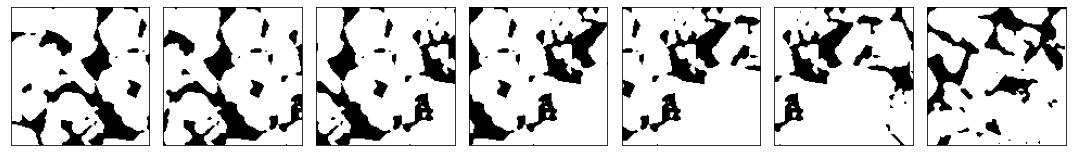

In [16]:
fig = plt.figure(figsize=(15, 5))
columns = 7
rows = 1
for i in range(1, columns*rows +1):
    img = DATASET[i+15,10,:,:]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img,cmap = 'gray')
    plt.xticks([], [])
    plt.yticks([], [])
fig.tight_layout()
plt.show()